In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
from scipy import stats
from numpy.random import randn

In [2]:
# Data Loading

# from google.colab import drive
# drive.mount('/content/drive/', force_remount = True)
# github url  - https://github.com/lokeshkotana/Data-Prediction/blob/main/Metro_Interstate_Traffic_Volume.csv
df = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

In [3]:
print(df)

      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
0        None  288.28      0.0      0.0          40        Clouds   
1        None  289.36      0.0      0.0          75        Clouds   
2        None  289.58      0.0      0.0          90        Clouds   
3        None  290.13      0.0      0.0          90        Clouds   
4        None  291.14      0.0      0.0          75        Clouds   
...       ...     ...      ...      ...         ...           ...   
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0          90  Thunderstorm   
48202    None  282.09      0.0      0.0          90        Clouds   
48203    None  282.12      0.0      0.0          90        Clouds   

          weather_description         date_time  traffic_volume  
0            scattered clouds  02-10-2012 09:00          5545.0  
1               broken clouds  02-10-20

In [ ]:
# ----------------------   DATA CLEANING   ---------------------------------------------

In [4]:
# Finding missing values in the data set

df.isnull().sum()

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         8
dtype: int64

In [5]:
# Handling misssing values

# Found missing values in traffic_volume,  Replacing NULL values with mean

new_df = df
mean =  new_df.traffic_volume.mean()
new_df.traffic_volume.fillna( mean ,inplace=True)

In [ ]:
# Checking whether missing values are filled properly

new_df.isnull().sum()

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         0
dtype: int64

In [ ]:
# ------------------  Measure of Central Tendency --------------------------------

In [6]:
# Using measure of central tendency of Mean

new_df.mean(numeric_only=True)

temp               281.205870
rain_1h              0.334264
snow_1h              0.000222
clouds_all          49.362231
traffic_volume    3259.793842
dtype: float64

In [ ]:
# Using measure of central tendency of Median

new_df.median(numeric_only=True)

temp               282.45
rain_1h              0.00
snow_1h              0.00
clouds_all          64.00
traffic_volume    3379.00
dtype: float64

In [ ]:
# Using measure of central tendency of Mode

print('\n holiday : \n' , new_df.holiday.mode())
print('\n temp : \n' , new_df.temp.mode())
print('\n rain_1h : \n' , new_df.rain_1h.mode())
print('\n snow_1h : \n' , new_df.snow_1h.mode())
print('\n clouds_all : \n' , new_df.clouds_all.mode())
print('\n weather_main : \n' , new_df.weather_main.mode())
print('\n weather_description : \n' , new_df.weather_description.mode())
print('\n date_time : \n' , new_df.date_time.mode())
print('\n traffic_volume : \n' , new_df.traffic_volume.mode())


 holiday : 
 0    None
dtype: object

 temp : 
 0    274.15
dtype: float64

 rain_1h : 
 0    0.0
dtype: float64

 snow_1h : 
 0    0.0
dtype: float64

 clouds_all : 
 0    90
dtype: int64

 weather_main : 
 0    Clouds
dtype: object

 weather_description : 
 0    sky is clear
dtype: object

 date_time : 
 0    18-04-2013 22:00
1    19-05-2013 10:00
dtype: object

 traffic_volume : 
 0    353.0
1    356.0
dtype: float64


In [ ]:
# ------------------- DISPERSION ---------------------------------------

In [ ]:
# using Standard Deviation

print('\n temp : \n' , statistics.stdev(new_df.temp) )
print('\n rain_1h : \n' , statistics.stdev(new_df.rain_1h) )
print('\n snow_1h : \n' , statistics.stdev(new_df.snow_1h) )
print('\n clouds_all : \n' , statistics.stdev(new_df.clouds_all) )
print('\n traffic_volume : \n' , statistics.stdev(new_df.traffic_volume) )


 temp : 
 13.33823191267633

 rain_1h : 
 44.78913303693919

 snow_1h : 
 0.00816761120536159

 clouds_all : 
 39.01575046141364

 traffic_volume : 
 1986.644830278306


In [ ]:
# using Inter Quartile Range (IQR)

print('\n temp : \n' , stats.iqr(new_df.temp , interpolation = 'midpoint') )
print('\n rain_1h : \n' , stats.iqr(new_df.rain_1h , interpolation = 'midpoint') )
print('\n snow_1h : \n' , stats.iqr(new_df.snow_1h , interpolation = 'midpoint') )
print('\n clouds_all : \n' , stats.iqr(new_df.clouds_all , interpolation = 'midpoint') )
print('\n traffic_volume : \n' , stats.iqr(new_df.traffic_volume , interpolation = 'midpoint') )


 temp : 
 19.645999999999958

 rain_1h : 
 0.0

 snow_1h : 
 0.0

 clouds_all : 
 89.0

 traffic_volume : 
 3739.0


In [ ]:
#     -------------------------    DATA VISUALIZATION ---------------------------------

In [ ]:
# Data Processing for limitations
new_df['temp_c'] = new_df['temp'] - 273.15
new_df['rain_1h'] = np.where( (new_df.rain_1h > 9000 ),  new_df.rain_1h.mean() , new_df.rain_1h )
new_df['temp_c'] = np.where( (new_df.temp_c < -50 ),  new_df.temp_c.mean() , new_df.temp_c )

In [ ]:
date_time = pd.to_datetime(new_df['date_time'])

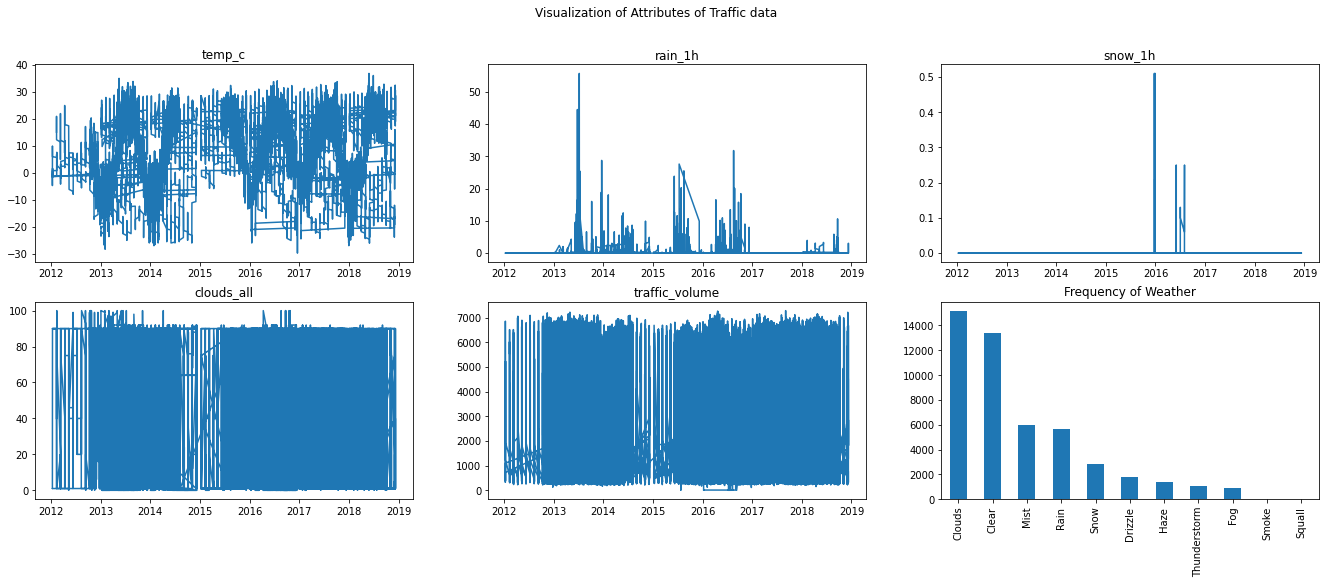

In [ ]:
# Visualising Attributes of Traffic data

fig, ax = plt.subplots(2, 3,figsize=(23,8))
fig.suptitle('Visualization of Attributes of Traffic data')

ax[0, 0].plot(date_time, new_df.temp_c)
ax[0, 0].set_title('temp_c')

ax[0, 1].plot(date_time, new_df.rain_1h)
ax[0, 1].set_title('rain_1h')

ax[0, 2].plot(date_time , new_df.snow_1h)
ax[0, 2].set_title('snow_1h')

ax[1, 0].plot(date_time , new_df.clouds_all)
ax[1, 0].set_title('clouds_all')

ax[1, 1].plot(date_time , new_df.traffic_volume)
ax[1, 1].set_title('traffic_volume')

ax[1, 2] = new_df["weather_main"].value_counts().plot(kind='bar', title ='Frequency of Weather')

In [ ]:
# Aggregating the whole data frame by adding all daily traffic volume through Month wise

new_df['Month']  = date_time.dt.to_period('M')
new_df_Agre = new_df.groupby('Month').sum()
new_df_Agre.reset_index(inplace=True)
new_df_Agre[['Month','traffic_volume']]

,Month,traffic_volume
0,2012-01,211902.0
1,2012-02,230257.0
2,2012-03,248804.0
3,2012-04,251174.0
4,2012-05,257992.0
...,...,...
79,2018-08,2900571.0
80,2018-09,2836438.0
81,2018-10,816751.0
82,2018-11,830871.0


In [ ]:
# Converting 'Month' column to datetype datetime

new_df_Agre['Month'] = new_df_Agre['Month'].astype(str) + '-01'
new_df_Agre['Month'] = pd.to_datetime(new_df_Agre['Month'])

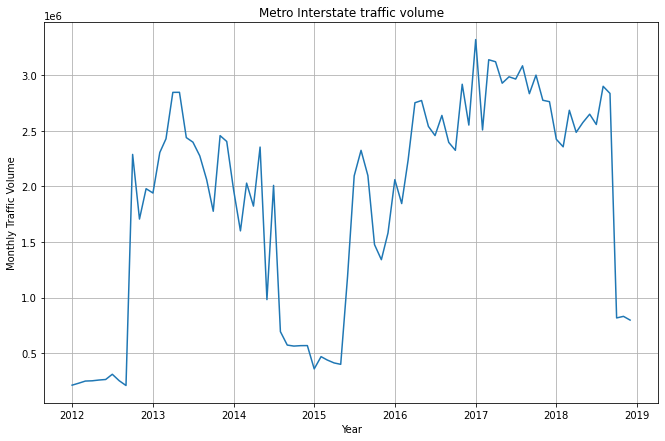

In [ ]:
# Plotting the Monthly Trafic Volume - year wise

xpoints = new_df_Agre.Month
ypoints = new_df_Agre.traffic_volume
plt.figure(figsize=(11,7))
plt.xlabel('Year')
plt.ylabel('Monthly Traffic Volume')
plt.title('Metro Interstate traffic volume')
plt.plot(xpoints, ypoints)
plt.grid()
plt.show()

In [ ]:
# ------------------------------   Forecasting -------------------------------------

In [ ]:
#pip install TPOT
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error, mean_squared_error, mean_absolute_error,r2_score

In [ ]:
data = new_df
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,02-10-2012 09:00,5545.0
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,02-10-2012 10:00,4516.0
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00,4767.0
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00,5026.0
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00,4918.0


In [ ]:
# Data Preprocessing for model building
# encoding THE CATEGORIES
data['holiday'] = pd.Categorical(data['holiday']).codes
data['weather_main'] = pd.Categorical(data['weather_main']).codes
data['weather_description'] = pd.Categorical(data['weather_description']).codes
data['year'] = data['date_time'].map(lambda x: int(x.split(" ")[0].split("-")[0]))
data['month'] = data['date_time'].map(lambda x: int(x.split(" ")[0].split("-")[1]))
data['day'] = data['date_time'].map(lambda x: int(x.split(" ")[0].split("-")[2]))
data['hour'] = data['date_time'].map(lambda x: int(x.split(" ")[1].split(":")[0]))

data.drop(['date_time','temp_c'], axis=1, inplace=True) 
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,year,month,day,hour
0,7,288.28,0.0,0.0,40,1,24,5545.0,2,10,2012,9
1,7,289.36,0.0,0.0,75,1,2,4516.0,2,10,2012,10
2,7,289.58,0.0,0.0,90,1,19,4767.0,2,10,2012,11
3,7,290.13,0.0,0.0,90,1,19,5026.0,2,10,2012,12
4,7,291.14,0.0,0.0,75,1,2,4918.0,2,10,2012,13


In [ ]:
# split data into X and y
Y = data['traffic_volume'].copy(deep=True)
X = data.copy(deep=True)
X.drop(['traffic_volume'], inplace=True, axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  test_size=0.25,  shuffle=True, random_state=42)

In [ ]:
X_train.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,year,month,day,hour
20524,7,258.90,0.00,0.0,90,1,19,9,1,2016,8
8748,7,286.31,0.00,0.0,0,0,1,2,9,2013,7
33068,7,275.58,0.00,0.0,90,5,17,26,4,2017,7
19696,7,269.51,0.00,0.0,90,1,19,26,11,2015,23
6857,7,287.71,1.44,0.0,92,5,17,10,6,2013,14


In [ ]:
tpot = TPOTRegressor()
tpot.fit(X_train,Y_train)

TPOTRegressor(config_dict=None, crossover_rate=0.1, cv=5,
              disable_update_check=False, early_stop=None, generations=100,
              log_file=None, max_eval_time_mins=5, max_time_mins=None,
              memory=None, mutation_rate=0.9, n_jobs=1, offspring_size=None,
              periodic_checkpoint_folder=None, population_size=100,
              random_state=None, scoring=None, subsample=1.0, template=None,
              use_dask=False, verbosity=0, warm_start=False)

In [ ]:
Y_predictions = tpot.predict(X_test)
Y_predictions

array([4884.78073261, 2687.67866632,  867.15937257, ..., 2328.35129629,
       4345.57757175, 4236.41101544])

In [ ]:
# Showing Accuracy of Prediction

r2 = r2_score(Y_test, Y_predictions)
mae = mean_absolute_error(Y_test, Y_predictions)
mse = mean_squared_error(Y_test, Y_predictions)
rmse = np.sqrt(mse)
print("R Squared : ", r2)
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse)
print("Root Mean Squared Error : ", rmse)

R Squared :  0.8251602110643284
Mean Absolute Error :  567.7560233697109
Mean Squared Error :  691143.0462623425
Root Mean Squared Error :  831.3501345776896


In [ ]:
print('Bias Error')
print('Actual value :',np.mean(Y_test))
print('Predicted value :',np.mean(Y_predictions))

Bias Error
Actual value : 3259.528020526699
Predicted value : 3255.085340637503


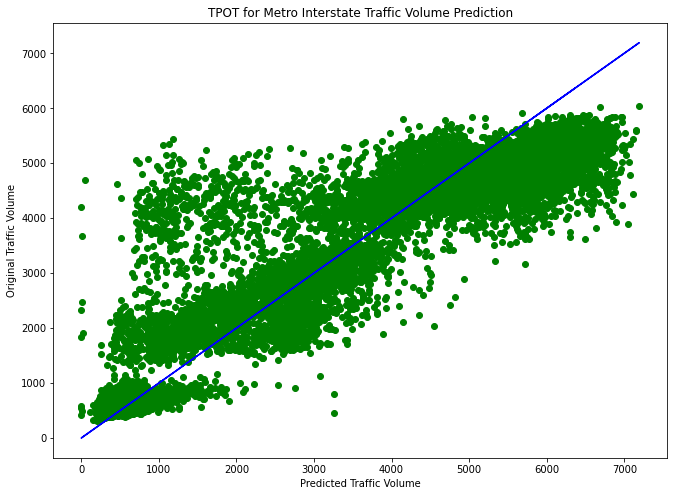

In [ ]:
# Plotting Prediction and Actual data

plt.figure(figsize=(11,8))
plt.scatter(Y_test,Y_predictions,color = "green",Label = "Scatter")
plt.plot(Y_test,Y_test,color = "blue",Label = "Regression")
plt.xlabel("Predicted Traffic Volume")
plt.ylabel("Original Traffic Volume")
plt.title('TPOT for Metro Interstate Traffic Volume Prediction')
plt.show()